# Using a Decision Tree to categorize emails

## Decision Tree Mini Project

In this project, we will again try to classify emails, this time using a decision tree.   The starter code is in decision_tree/dt_author_id.py.

### Part 1: Get the Decision Tree Running
Get the decision tree up and running as a classifier, setting min_samples_split=40.  It will probably take a while to train.  What’s the accuracy?

### Part 2: Speed It Up
You found in the SVM mini-project that the parameter tune can significantly speed up the training time of a machine learning algorithm.  A general rule is that the parameters can tune the complexity of the algorithm, with more complex algorithms generally running more slowly.  

Another way to control the complexity of an algorithm is via the number of features that you use in training/testing.  The more features the algorithm has available, the more potential there is for a complex fit.  We will explore this in detail in the “Feature Selection” lesson, but you’ll get a sneak preview now.

- find the number of features in your data.  The data is organized into a numpy array where the number of rows is the number of data points and the number of columns is the number of features; so to extract this number, use a line of code like len(features_train[0])
- go into tools/email_preprocess.py, and find the line of code that looks like this:     selector = SelectPercentile(f_classif, percentile=1)  Change percentile from 10 to 1.
- What’s the number of features now?
- What do you think SelectPercentile is doing?  Would a large value for percentile lead to a more complex or less complex decision tree, all other things being equal?
- Note the difference in training time depending on the number of features.  
- What’s the accuracy when percentile = 1?

In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from cache_sklearn_model import retrieve_cached_model, save_cached_model
from email_preprocess import preprocess_emails

In [2]:
def get_preprocess_emails_data(amount_of_training_data = 1.0, percentile_of_features = 10):
    features_train, features_test, labels_train, labels_test = preprocess_emails(percentile_of_features)

    print(f"training on subset of features: ({percentile_of_features}%)")

    if amount_of_training_data == 1:
        features = features_train
        labels = labels_train
    else:
        features,_,labels,_ = train_test_split(
            features_train,
            labels_train,
            train_size=amount_of_training_data,
            random_state=91, 
        )

    data_percentile = round(len(features)/ (len(features_train) + 0.0000001)*100)
    print(f"training on subset of traning data: {len(features)} out of {len(features_train)} ({data_percentile}%)")

    data_desc = f'preprocess_emails_{round(amount_of_training_data*100)}_{percentile_of_features}'

    return [data_desc, features, features_test, labels, labels_test]

In [3]:
def optimize_dt(amount_of_training_data = 1.0, percentile_of_features = 10, **kwargs):

    data_desc, features_train, features_test, labels_train, labels_test = get_preprocess_emails_data(amount_of_training_data, percentile_of_features)

    clf = DecisionTreeClassifier(random_state = 45, **kwargs)
    [is_restored, clf, meta] = retrieve_cached_model(clf, data_desc)
    
    fit_delta = meta.get("fit_time_sec")
    if not is_restored:
        t = time()
        clf.fit(features_train, labels_train)
        fit_delta = round(time()-t, 3)
        save_cached_model(clf, data_desc, {
            "fit_time_sec": fit_delta,
        })
    print("clf fit time:", fit_delta, "s")
    
    # output predictions
    t = time()
    labels_pred = clf.predict(features_test)
    pred_delta = round(time()-t, 3)
    print("clf predict time:", pred_delta, "s")
    
    # measure
    n_nodes = clf.tree_.node_count
    n_leaves = clf.get_n_leaves()
    depth = clf.get_depth()
    print("n_nodes:", n_nodes, "n_leaves:", n_leaves, "depth:", depth)

    print(classification_report(labels_pred, labels_test, digits=4))

    accuracy = accuracy_score(labels_pred, labels_test)
    print(f'| {amount_of_training_data} | {kwargs} | {fit_delta}s | {pred_delta}s | {accuracy} |')

    return clf

## How long do DTs take to compute?

In [4]:
_ = optimize_dt(amount_of_training_data = 0.10)

training on subset of features: (10%)
training on subset of traning data: 1582 out of 15820 (10%)
clf fit time: 1.116 s
clf predict time: 0.014 s
n_nodes: 279 n_leaves: 140 depth: 87
              precision    recall  f1-score   support

           0     0.8578    0.9012    0.8789       850
           1     0.9029    0.8601    0.8810       908

    accuracy                         0.8800      1758
   macro avg     0.8803    0.8807    0.8800      1758
weighted avg     0.8811    0.8800    0.8800      1758

| 0.1 | {} | 1.116s | 0.014s | 0.8799772468714449 |


In [5]:
_ = optimize_dt(amount_of_training_data = 0.20)

training on subset of features: (10%)
training on subset of traning data: 3164 out of 15820 (20%)
clf fit time: 5.182 s
clf predict time: 0.013 s
n_nodes: 379 n_leaves: 190 depth: 119
              precision    recall  f1-score   support

           0     0.9239    0.9461    0.9348       872
           1     0.9457    0.9233    0.9343       886

    accuracy                         0.9346      1758
   macro avg     0.9348    0.9347    0.9346      1758
weighted avg     0.9348    0.9346    0.9346      1758

| 0.2 | {} | 5.182s | 0.013s | 0.934584755403868 |


In [6]:
_ = optimize_dt(amount_of_training_data = 0.40)

training on subset of features: (10%)
training on subset of traning data: 6328 out of 15820 (40%)
clf fit time: 18.78 s
clf predict time: 0.011 s
n_nodes: 559 n_leaves: 280 depth: 173
              precision    recall  f1-score   support

           0     0.9552    0.9574    0.9563       891
           1     0.9561    0.9539    0.9550       867

    accuracy                         0.9556      1758
   macro avg     0.9556    0.9556    0.9556      1758
weighted avg     0.9556    0.9556    0.9556      1758

| 0.4 | {} | 18.78s | 0.011s | 0.9556313993174061 |


In [7]:
_ = optimize_dt(amount_of_training_data = 0.80)

training on subset of features: (10%)
training on subset of traning data: 12656 out of 15820 (80%)
clf fit time: 55.202 s
clf predict time: 0.012 s
n_nodes: 761 n_leaves: 381 depth: 215
              precision    recall  f1-score   support

           0     0.9731    0.9742    0.9737       892
           1     0.9734    0.9723    0.9728       866

    accuracy                         0.9733      1758
   macro avg     0.9733    0.9733    0.9733      1758
weighted avg     0.9733    0.9733    0.9733      1758

| 0.8 | {} | 55.202s | 0.012s | 0.9732650739476678 |


In [8]:
_ = optimize_dt(amount_of_training_data = 1)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 77.709 s
clf predict time: 0.012 s
n_nodes: 813 n_leaves: 407 depth: 232
              precision    recall  f1-score   support

           0     0.9933    0.9889    0.9911       897
           1     0.9884    0.9930    0.9907       861

    accuracy                         0.9909      1758
   macro avg     0.9909    0.9909    0.9909      1758
weighted avg     0.9909    0.9909    0.9909      1758

| 1 | {} | 77.709s | 0.012s | 0.9908987485779295 |


In [9]:
current_best = "| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |"

### Quiz: Your First Email DT: Accuracy

In [10]:
_ = optimize_dt(min_samples_split=40)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 78.901 s
clf predict time: 0.012 s
n_nodes: 703 n_leaves: 352 depth: 232
              precision    recall  f1-score   support

           0     0.9787    0.9765    0.9776       895
           1     0.9757    0.9780    0.9769       863

    accuracy                         0.9772      1758
   macro avg     0.9772    0.9773    0.9772      1758
weighted avg     0.9773    0.9772    0.9772      1758

| 1.0 | {'min_samples_split': 40} | 78.901s | 0.012s | 0.9772468714448237 |


### Quiz: Speeding Up Via Feature Selection

In [11]:
print("number of features currently training on:", len(get_preprocess_emails_data()[1][0]))

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
number of features currently training on: 3785


Accuracy Using 1% of Features

In [12]:
_ = optimize_dt(min_samples_split=40, percentile_of_features=1)

training on subset of features: (1%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 4.997 s
clf predict time: 0.002 s
n_nodes: 679 n_leaves: 340 depth: 190
              precision    recall  f1-score   support

           0     0.9552    0.9793    0.9671       871
           1     0.9792    0.9549    0.9669       887

    accuracy                         0.9670      1758
   macro avg     0.9672    0.9671    0.9670      1758
weighted avg     0.9673    0.9670    0.9670      1758

| 1.0 | {'min_samples_split': 40} | 4.997s | 0.002s | 0.9670079635949943 |


## How do different params perform on this dataset?

#### criterion
I don't think `criterion` will have much of an impact since both `gini` and `entropy` are very similar and only make a difference in 2% of cases.

https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain

In [13]:
_ = optimize_dt(criterion="entropy")
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 22.557 s
clf predict time: 0.013 s
n_nodes: 763 n_leaves: 382 depth: 174
              precision    recall  f1-score   support

           0     0.9922    0.9966    0.9944       889
           1     0.9965    0.9919    0.9942       869

    accuracy                         0.9943      1758
   macro avg     0.9943    0.9943    0.9943      1758
weighted avg     0.9943    0.9943    0.9943      1758

| 1.0 | {'criterion': 'entropy'} | 22.557s | 0.013s | 0.9943117178612059 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


In [14]:
0.9943117178612059 - 0.9908987485779295

0.0034129692832763903

Using entropy only increases it by 0.0034. I'm doubtful that this is significant.
However, I'll look at it again once all the other parameters are tuned.

#### splitter
How does the `splitter="random"` differ from `max_features`?

In [15]:
_ = optimize_dt(splitter="random")
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 46.89 s
clf predict time: 0.015 s
n_nodes: 863 n_leaves: 432 depth: 240
              precision    recall  f1-score   support

           0     0.9899    0.9910    0.9905       892
           1     0.9908    0.9896    0.9902       866

    accuracy                         0.9903      1758
   macro avg     0.9903    0.9903    0.9903      1758
weighted avg     0.9903    0.9903    0.9903      1758

| 1.0 | {'splitter': 'random'} | 46.89s | 0.015s | 0.9903299203640501 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


Seems to have a shorter training time and lower accuracy

#### class_weight
This dataset is already class balanced so class_weight shouldn't make a difference

In [16]:
def temp():
    data_desc, features_train, features_test, labels_train, labels_test = get_preprocess_emails_data()
    all_labels = labels_train + labels_test
    print(f'class 1: {sum(all_labels)}')
    print(f'class 2: {len(all_labels)-sum(all_labels)}')
temp()

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
class 1: 8801
class 2: 8777


In [17]:
_ = optimize_dt(class_weight="balanced")
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 80.095 s
clf predict time: 0.014 s
n_nodes: 813 n_leaves: 407 depth: 232
              precision    recall  f1-score   support

           0     0.9933    0.9889    0.9911       897
           1     0.9884    0.9930    0.9907       861

    accuracy                         0.9909      1758
   macro avg     0.9909    0.9909    0.9909      1758
weighted avg     0.9909    0.9909    0.9909      1758

| 1.0 | {'class_weight': 'balanced'} | 80.095s | 0.014s | 0.9908987485779295 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


### Pruning methods

#### max_depth

I suspect max_depth will be less effective than `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`, etc.

However, it will allow graphing the tree.

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 3.575 s
clf predict time: 0.014 s
n_nodes: 7 n_leaves: 4 depth: 2
              precision    recall  f1-score   support

           0     0.4894    0.9776    0.6522       447
           1     0.9884    0.6522    0.7858      1311

    accuracy                         0.7349      1758
   macro avg     0.7389    0.8149    0.7190      1758
weighted avg     0.8615    0.7349    0.7519      1758

| 1.0 | {'max_depth': 2} | 3.575s | 0.014s | 0.7349260523321957 |


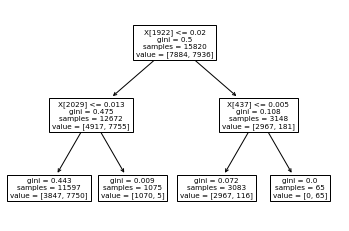

In [18]:
_ = plot_tree(optimize_dt(max_depth=2))

In [19]:
_ = optimize_dt(max_depth=200)
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 76.591 s
clf predict time: 0.012 s
n_nodes: 749 n_leaves: 375 depth: 200
              precision    recall  f1-score   support

           0     0.9922    0.9855    0.9888       899
           1     0.9850    0.9919    0.9884       859

    accuracy                         0.9886      1758
   macro avg     0.9886    0.9887    0.9886      1758
weighted avg     0.9886    0.9886    0.9886      1758

| 1.0 | {'max_depth': 200} | 76.591s | 0.012s | 0.9886234357224118 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


#### `min_samples_split`
what happens if we double?

In [20]:
_ = optimize_dt(min_samples_split=4)
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 77.916 s
clf predict time: 0.019 s
n_nodes: 811 n_leaves: 406 depth: 232
              precision    recall  f1-score   support

           0     0.9933    0.9856    0.9894       900
           1     0.9850    0.9930    0.9890       858

    accuracy                         0.9892      1758
   macro avg     0.9891    0.9893    0.9892      1758
weighted avg     0.9892    0.9892    0.9892      1758

| 1.0 | {'min_samples_split': 4} | 77.916s | 0.019s | 0.9891922639362912 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


In [21]:
_ = optimize_dt(min_samples_split=3)
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 75.32 s
clf predict time: 0.013 s
n_nodes: 811 n_leaves: 406 depth: 232
              precision    recall  f1-score   support

           0     0.9933    0.9856    0.9894       900
           1     0.9850    0.9930    0.9890       858

    accuracy                         0.9892      1758
   macro avg     0.9891    0.9893    0.9892      1758
weighted avg     0.9892    0.9892    0.9892      1758

| 1.0 | {'min_samples_split': 3} | 75.32s | 0.013s | 0.9891922639362912 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


One benefit is you can restrict leaf nodes by a smaller amount. Not sure what the implications of this are in practical terms as you can still have leaf nodes with a single example.

#### `min_samples_leaf`
try doubling

In [22]:
_ = optimize_dt(min_samples_leaf=2)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 75.351 s
clf predict time: 0.012 s
n_nodes: 811 n_leaves: 406 depth: 225
              precision    recall  f1-score   support

           0     0.9843    0.9821    0.9832       895
           1     0.9815    0.9838    0.9826       863

    accuracy                         0.9829      1758
   macro avg     0.9829    0.9830    0.9829      1758
weighted avg     0.9829    0.9829    0.9829      1758

| 1.0 | {'min_samples_leaf': 2} | 75.351s | 0.012s | 0.9829351535836177 |


#### `min_weight_fraction_leaf`
should be the same as `min_samples_leaf` but weighted, which doesn't apply to this dataset

#### `max_leaf_nodes`
set to just below existing best: 407

In [23]:
_ = optimize_dt(max_leaf_nodes=399)
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 109.907 s
clf predict time: 0.015 s
n_nodes: 797 n_leaves: 399 depth: 225
              precision    recall  f1-score   support

           0     0.9933    0.9900    0.9916       896
           1     0.9896    0.9930    0.9913       862

    accuracy                         0.9915      1758
   macro avg     0.9914    0.9915    0.9915      1758
weighted avg     0.9915    0.9915    0.9915      1758

| 1.0 | {'max_leaf_nodes': 399} | 109.907s | 0.015s | 0.9914675767918089 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


max_leaf_nodes seems like the finest grain way to adjust a DT however, using it seems like it would lead to over fitting the test data.

#### `min_impurity_decrease`
I doubt this will help since all the other ways of reducing node complexity has lead to not fitting as well to the training set. At this point I'm concerned that the training and test sets are too similar and that none of these models will generalize well to new data.

In [24]:
_ = optimize_dt(min_impurity_decrease=0.1)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 1.572 s
clf predict time: 0.013 s
n_nodes: 1 n_leaves: 1 depth: 0
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     1.0000    0.4920    0.6596      1758

    accuracy                         0.4920      1758
   macro avg     0.5000    0.2460    0.3298      1758
weighted avg     1.0000    0.4920    0.6596      1758

| 1.0 | {'min_impurity_decrease': 0.1} | 1.572s | 0.013s | 0.4920364050056883 |


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
_ = optimize_dt(min_impurity_decrease=0.0001)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 74.897 s
clf predict time: 0.014 s
n_nodes: 595 n_leaves: 298 depth: 136
              precision    recall  f1-score   support

           0     0.9854    0.9854    0.9854       893
           1     0.9850    0.9850    0.9850       865

    accuracy                         0.9852      1758
   macro avg     0.9852    0.9852    0.9852      1758
weighted avg     0.9852    0.9852    0.9852      1758

| 1.0 | {'min_impurity_decrease': 0.0001} | 74.897s | 0.014s | 0.9852104664391353 |


#### ccp_alpha

In [26]:
# def look_at_cost_complexity_pruning_path():
#     data_desc, features_train, features_test, labels_train, labels_test = get_preprocess_emails_data()

#     clf = optimize_dt(amount_of_training_data = 1)
#     path = clf.cost_complexity_pruning_path(features_train, labels_train)
#     print(path)
# look_at_cost_complexity_pruning_path()

This is taking a long time and I'm doubtful that this pruning technique will be any different than the others.

In [27]:
_ = optimize_dt(ccp_alpha=0.0001)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 73.812 s
clf predict time: 0.014 s
n_nodes: 609 n_leaves: 305 depth: 138
              precision    recall  f1-score   support

           0     0.9899    0.9877    0.9888       895
           1     0.9873    0.9896    0.9884       863

    accuracy                         0.9886      1758
   macro avg     0.9886    0.9886    0.9886      1758
weighted avg     0.9886    0.9886    0.9886      1758

| 1.0 | {'ccp_alpha': 0.0001} | 73.812s | 0.014s | 0.9886234357224118 |


### Introducing Randomness

#### max_features

Does max_features do anything when splitter="best"? **yes**

In [28]:
_ = optimize_dt(max_features = "sqrt")
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 0.925 s
clf predict time: 0.013 s
n_nodes: 2097 n_leaves: 1049 depth: 278
              precision    recall  f1-score   support

           0     0.9899    0.9910    0.9905       892
           1     0.9908    0.9896    0.9902       866

    accuracy                         0.9903      1758
   macro avg     0.9903    0.9903    0.9903      1758
weighted avg     0.9903    0.9903    0.9903      1758

| 1.0 | {'max_features': 'sqrt'} | 0.925s | 0.013s | 0.9903299203640501 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


In [29]:
_ = optimize_dt(max_features = "log2")
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 0.31 s
clf predict time: 0.014 s
n_nodes: 4945 n_leaves: 2473 depth: 345
              precision    recall  f1-score   support

           0     0.9765    0.9831    0.9798       887
           1     0.9827    0.9759    0.9793       871

    accuracy                         0.9795      1758
   macro avg     0.9796    0.9795    0.9795      1758
weighted avg     0.9795    0.9795    0.9795      1758

| 1.0 | {'max_features': 'log2'} | 0.31s | 0.014s | 0.9795221843003413 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


In [30]:
# if it's so fast can we add more features?
_ = optimize_dt(percentile_of_features=20, max_features = "sqrt")
print(current_best)

training on subset of features: (20%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 1.702 s
clf predict time: 0.028 s
n_nodes: 2801 n_leaves: 1401 depth: 318
              precision    recall  f1-score   support

           0     0.9854    0.9778    0.9816       900
           1     0.9769    0.9848    0.9808       858

    accuracy                         0.9812      1758
   macro avg     0.9812    0.9813    0.9812      1758
weighted avg     0.9813    0.9812    0.9812      1758

| 1.0 | {'max_features': 'sqrt'} | 1.702s | 0.028s | 0.9812286689419796 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


There's probably some tuning in terms of number of features.
Figuring out which features expain the data the best is probably something to consider too

In [31]:
_ = optimize_dt(splitter="random", max_features = "sqrt")
print(current_best)

training on subset of features: (10%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 1.031 s
clf predict time: 0.015 s
n_nodes: 3697 n_leaves: 1849 depth: 401
              precision    recall  f1-score   support

           0     0.9720    0.9830    0.9775       883
           1     0.9827    0.9714    0.9770       875

    accuracy                         0.9772      1758
   macro avg     0.9773    0.9772    0.9772      1758
weighted avg     0.9773    0.9772    0.9772      1758

| 1.0 | {'splitter': 'random', 'max_features': 'sqrt'} | 1.031s | 0.015s | 0.9772468714448237 |
| 1 | {} | 77.709s | 0.013s | 0.9908987485779295 |


## Optimize training of DT for this dataset

In [32]:
# try increasing the number of features
_ = optimize_dt(percentile_of_features=20)

training on subset of features: (20%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 138.702 s
clf predict time: 0.03 s
n_nodes: 821 n_leaves: 411 depth: 234
              precision    recall  f1-score   support

           0     0.9955    0.9933    0.9944       895
           1     0.9931    0.9954    0.9942       863

    accuracy                         0.9943      1758
   macro avg     0.9943    0.9943    0.9943      1758
weighted avg     0.9943    0.9943    0.9943      1758

| 1.0 | {} | 138.702s | 0.03s | 0.9943117178612059 |


In [33]:
_ = optimize_dt(percentile_of_features=20, criterion="entropy")

training on subset of features: (20%)
training on subset of traning data: 15820 out of 15820 (100%)
clf fit time: 45.27 s
clf predict time: 0.03 s
n_nodes: 781 n_leaves: 391 depth: 190
              precision    recall  f1-score   support

           0     0.9944    0.9944    0.9944       893
           1     0.9942    0.9942    0.9942       865

    accuracy                         0.9943      1758
   macro avg     0.9943    0.9943    0.9943      1758
weighted avg     0.9943    0.9943    0.9943      1758

| 1.0 | {'criterion': 'entropy'} | 45.27s | 0.03s | 0.9943117178612059 |


# Conclusion
Using more data did increased the quality of the outcomes.
Using entropy instead of the gini index did seems to result in the best solution.

# Questions

> Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

How do you balance a data by class?
**Using `class_weight="balanced"`**

> There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

What does it mean to have an XOR, parity, or multiplexer problems in data?

**XOR**: when one feature, or the other exist there is a positive effect, if they both exist it is negative. This should be true for Naive Bayes since each feature is assessed independently.

> Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

What is an ensemble and how do you use it?
**Should be in the next section**